In [1]:
import pandas as pd
from ETL import discovery, discovery_log_dataframe
import os
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_folder_file = "/Users/yamada/USP/Materias/7 semestre/Mineracao de dados/Celonis Dataset/BPI Challenge 2020 - Prepaid Travel Costs/"
path_folder_bpmn = "/Users/yamada/USP/Materias/7 semestre/Mineracao de dados/Celonis Dataset/BPI Challenge 2020 - Prepaid Travel Costs/"
path_folder_png = "."
results = discovery(path_folder_file,path_folder_bpmn,path_folder_png)

/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 2099/2099 [00:00<00:00, 4979.87it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

Precision - Token replay: 0.12170953897488468


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 215.78it/s]


Generalization: 0.8949746643642011
Simplicity: 0.5897435897435898


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 2087.90it/s]


Precision - Token replay: 0.958789019115937


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 978.48it/s] 


Generalization: 0.5988575329285628
Simplicity: 0.5238095238095238


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 6541.97it/s]


Precision - Token replay: 0.9821635672865426


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 2866.59it/s]


Generalization: 0.829298658766102
Simplicity: 0.6103896103896105


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 17184.54it/s]


Precision - Token replay: 0.0


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 913.86it/s] 


Generalization: 0.8773091720949231
Simplicity: 0.19407894736842107


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 3429.52it/s]


Precision - Token replay: 1.0


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 410.81it/s]

Generalization: 0.8821865014090176
Simplicity: 0.09100585417775413


In [3]:
pd.DataFrame(results)

,Inductive_Miner,Heuristic_Miner,Heuristic_Miner_0.99,Alpha,Alpha_Plus
Precisao,0.121710,0.958789,0.982164,0.000000,1.000000
Generalizacao,0.894975,0.598858,0.829299,0.877309,0.882187
Simplicidade,0.589744,0.523810,0.610390,0.194079,0.091006


(array([0, 1, 2]),
 [Text(0, 0, 'Precisao'),
  Text(1, 0, 'Generalizacao'),
  Text(2, 0, 'Simplicidade')])

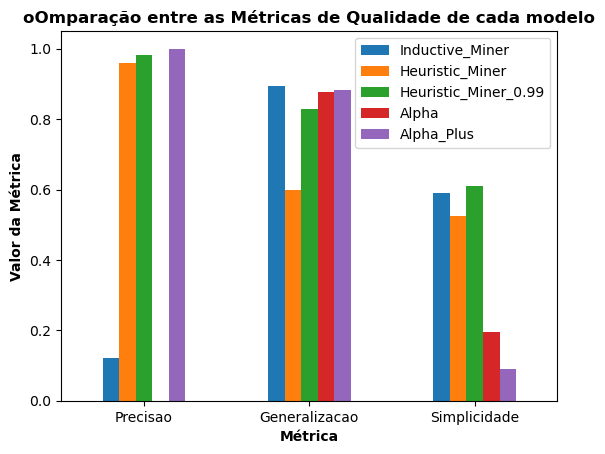

In [4]:
pd.DataFrame(results).plot(kind='bar')
plt.title("oOmparação entre as Métricas de Qualidade de cada modelo",fontdict = {'fontweight':'bold'})
plt.ylabel("Valor da Métrica",fontdict = {'fontweight':'bold'})
plt.xlabel("Métrica",fontdict = {'fontweight':'bold'})
plt.xticks(rotation=0)

# Concept Drift

In [5]:
path_folder_file = "/Users/yamada/USP/Materias/7 semestre/Mineracao de dados/Celonis Dataset/BPI Challenge 2020 - Prepaid Travel Costs/"
path_file = os.path.join(path_folder_file,'PrepaidTravelCost.xes')
log = pm4py.read_xes(path_file)

end_datetime = pd.to_datetime('2018-01-01').tz_localize('UTC')
log_until_2017 = log[log['time:timestamp'] < end_datetime]
log_after_2017 = log[log['time:timestamp'] >= end_datetime]


# Discover a model using log until 2017 and generating metrics for 100% of the log
path_folder_bpmn = "./results_model_100_check_100_log"
path_folder_png = "./results_model_100_check_100_log"
results_model_100_check_100_log, replayed_traces_model_100_check_100_log = discovery_log_dataframe(
    path_folder_bpmn=path_folder_bpmn,
    path_folder_png=path_folder_png,
    train_log=log,
    test_log=log
    )

# Discover a model using log until 2017 and generating metrics for 100% of the log
path_folder_bpmn = "./results_model_until_2017_check_100_log"
path_folder_png = "./results_model_until_2017_check_100_log"
results_model_until_2017_check_100_log, replayed_traces_model_until_2017_check_100_log = discovery_log_dataframe(
    path_folder_bpmn=path_folder_bpmn,
    path_folder_png=path_folder_png,
    train_log=log_until_2017,
    test_log=log
    )

# Discover a model using log after 2017 and generating metrics for 100% of the log
path_folder_bpmn = "./results_model_after_2017_check_100_log"
path_folder_png = "./results_model_after_2017_check_100_log"

results_model_after_2017_check_100_log, replayed_traces_model_after_2017_check_100_log = discovery_log_dataframe(
    path_folder_bpmn=path_folder_bpmn,
    path_folder_png=path_folder_png,
    train_log=log_after_2017,
    test_log=log
    )

# Discover a model using log until 2017 and generating metrics for log after 2017
path_folder_bpmn = "./results_model_after_2017_check_log_until_2017"
path_folder_png = "./results_model_after_2017_check_log_until_2017"

results_model_after_2017_check_log_until_2017, replayed_traces_model_after_2017_check_log_until_2017 = discovery_log_dataframe(
    path_folder_bpmn=path_folder_bpmn,
    path_folder_png=path_folder_png,
    train_log=log_after_2017,
    test_log=log_until_2017
    )

# Discover a model using log after 2017 and generating metrics for 100% of the log
path_folder_bpmn = "./results_model_until_2017_check_log_after_2017"
path_folder_png = "./results_model_until_2017_check_log_after_2017"

results_model_until_2017_check_log_after_2017, replayed_traces_model_until_2017_check_log_after_2017 = discovery_log_dataframe(
    path_folder_bpmn=path_folder_bpmn,
    path_folder_png=path_folder_png,
    train_log=log_until_2017,
    test_log=log_after_2017
    )

parsing log, completed traces :: 100%|██████████| 2099/2099 [00:00<00:00, 5187.84it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling 

Precision - Token replay: 0.18804590892897766


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 513.36it/s]


Generalization: 0.8760102515399909
Simplicity: 0.6158940397350994


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 510.96it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[star

Precision - Token replay: 0.9251116931135418


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 2002.60it/s]


Generalization: 0.7198388912446105
Simplicity: 0.5571428571428572


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 1480.44it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sta

Precision - Token replay: 0.8586442829935812


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 3659.02it/s]


Generalization: 0.8803339560499243
Simplicity: 0.7499999999999999


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 3651.17it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 22678.29it/s]


Precision - Token replay: 1.0


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 2124.26it/s]


Generalization: 0.8816064094801453
Simplicity: 0.33766233766233766


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 4707.37it/s]


Precision - Token replay: 0.831336982017201


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 1482.16it/s]

Generalization: 0.8883770749897026
Simplicity: 0.18493150684931506



replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:01<00:00, 844.36it/s]


Precision - Token replay: 0.2384421228268222


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 1176.48it/s]

Generalization: 0.9004445104401956
Simplicity: 0.5555555555555556



replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 1514.57it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[st

Precision - Token replay: 0.7103538542367569


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 1254.47it/s]

Generalization: 0.6564249115730509
Simplicity: 0.539906103286385



replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 1256.88it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[st

Precision - Token replay: 0.712325878678457


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 2814.31it/s]


Generalization: 0.8446375241386659
Simplicity: 0.6571428571428571


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 2819.78it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 19582.32it/s]


Precision - Token replay: 0.0


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 1290.74it/s]


Generalization: 0.897078911772131
Simplicity: 0.21951219512195122


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 1526.91it/s]


Precision - Token replay: 1.0


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 410.15it/s]


Generalization: 0.9027003889338185
Simplicity: 0.09173715029277814


replaying log with TBR, completed variants :: 100%|██████████| 165/165 [00:00<00:00, 866.21it/s]


Precision - Token replay: 0.18886194164917103


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 1894.65it/s]


Generalization: 0.6925793470422774
Simplicity: 0.5555555555555556


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 1895.13it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start

Precision - Token replay: 0.6808245445829338


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 2066.10it/s]


Generalization: 0.31039066545322314
Simplicity: 0.539906103286385


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 2053.88it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start

Precision - Token replay: 0.6200392927308448


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 3441.49it/s]


Generalization: 0.516981644249293
Simplicity: 0.6571428571428571


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 3424.69it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
replaying log with TBR, completed variants :: 100%|██████████| 165/165 [00:00<00:00, 17227.00it/s]


Precision - Token replay: 0.0


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 1818.05it/s]


Generalization: 0.5179600850097081
Simplicity: 0.21951219512195122


replaying log with TBR, completed variants :: 100%|██████████| 165/165 [00:00<00:00, 1580.35it/s]


Precision - Token replay: 1.0


replaying log with TBR, completed variants :: 100%|██████████| 51/51 [00:00<00:00, 492.24it/s]


Generalization: 0.5488543081331146
Simplicity: 0.09173715029277814


replaying log with TBR, completed variants :: 100%|██████████| 710/710 [00:01<00:00, 546.86it/s]


Precision - Token replay: 0.1661140920154407


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 410.28it/s]


Generalization: 0.7097741225169765
Simplicity: 0.6158940397350994


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 364.93it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[star

Precision - Token replay: 0.8480199410195197


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 1765.03it/s]


Generalization: 0.493891185072422
Simplicity: 0.5571428571428572


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 1759.97it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sta

Precision - Token replay: 0.7762337610103367


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 3306.05it/s]


Generalization: 0.746496582761218
Simplicity: 0.7499999999999999


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 3154.51it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
replaying log with TBR, completed variants :: 100%|██████████| 710/710 [00:00<00:00, 21596.13it/s]


Precision - Token replay: 1.0


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 1938.64it/s]


Generalization: 0.6459145554732799
Simplicity: 0.33766233766233766


replaying log with TBR, completed variants :: 100%|██████████| 710/710 [00:00<00:00, 4764.87it/s]


Precision - Token replay: 0.6439826280463731


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 1397.63it/s]


Generalization: 0.6728872368059522
Simplicity: 0.18493150684931506


replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 1386.76it/s]


In [6]:
def create_description(results:dict, description:str):
    df = pd.DataFrame(results)
    df['Description'] = description
    df.set_index('Description', append=True, inplace=True)   
    return df

df = pd.concat([
    create_description(results_model_100_check_100_log,'Discover 100% log check 100% log'),
    create_description(results_model_until_2017_check_100_log,'Discover until 2017 check 100% log'),
    create_description(results_model_after_2017_check_100_log,'Discover after 2017 check 100% log'),
    create_description(results_model_until_2017_check_log_after_2017,'Discover until 2017 check log after 2017'),
    create_description(results_model_after_2017_check_log_until_2017,'Discover after 2017 check log until 2017')
])


In [7]:
df

,,Inductive_Miner,Heuristic_Miner,Heuristic_Miner_0.99,Alpha,Alpha_Plus
,Description,,,,,
Precisao,Discover 100% log check 100% log,0.121710,0.958789,0.982164,0.000000,1.000000
Generalizacao,Discover 100% log check 100% log,0.894975,0.598858,0.829299,0.877309,0.882187
Simplicidade,Discover 100% log check 100% log,0.589744,0.523810,0.610390,0.194079,0.091006
Precisao,Discover until 2017 check 100% log,0.188046,0.925112,0.858644,1.000000,0.831337
Generalizacao,Discover until 2017 check 100% log,0.876010,0.719839,0.880334,0.881606,0.888377
Simplicidade,Discover until 2017 check 100% log,0.615894,0.557143,0.750000,0.337662,0.184932
Precisao,Discover after 2017 check 100% log,0.238442,0.710354,0.712326,0.000000,1.000000
Generalizacao,Discover after 2017 check 100% log,0.900445,0.656425,0.844638,0.897079,0.902700
Simplicidade,Discover after 2017 check 100% log,0.555556,0.539906,0.657143,0.219512,0.091737


In [15]:
# pd.DataFrame(replayed_traces)
# pd.DataFrame(replayed_traces)['trace_is_fit'].sum()/pd.DataFrame(replayed_traces)['trace_is_fit'].count()

def trace_conformance_porcentage(replayed_traces:dict,model_name:str):
    df = pd.DataFrame(replayed_traces[model_name])
    return df['trace_is_fit'].sum()/df.shape[0]

print(trace_conformance_porcentage(replayed_traces_model_100_check_100_log,'Inductive_Miner'))
print(trace_conformance_porcentage(replayed_traces_model_until_2017_check_100_log,'Inductive_Miner'))
print(trace_conformance_porcentage(replayed_traces_model_after_2017_check_100_log,'Inductive_Miner'))
print(trace_conformance_porcentage(replayed_traces_model_until_2017_check_log_after_2017,'Inductive_Miner'))
print(trace_conformance_porcentage(replayed_traces_model_after_2017_check_log_until_2017,'Inductive_Miner'))

0.8675559790376369
1.0
0.8440469536053661
1.0


In [19]:
pd.DataFrame(replayed_traces_model_after_2017_check_100_log['Inductive_Miner'])

,trace_is_fit,trace_fitness,activated_transitions,reached_marking,enabled_transitions_in_marking,transitions_with_problems,missing_tokens,consumed_tokens,remaining_tokens,produced_tokens
0,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,37,0,37
1,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,59,0,59
2,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,40,0,40
3,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,42,0,42
4,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,42,0,42
...,...,...,...,...,...,...,...,...,...,...
2094,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,37,0,37
2095,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,61,0,61
2096,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,61,0,61
2097,True,1.0,"[(tau_1, None), (init_loop_5, None), (tauSplit...",{sink: 1},{},[],0,61,0,61
